### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import imageio as iio
import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Compressed\archive_2\AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Dropping unnecessary columns


In [6]:
df.drop(["id","host_name", "calculated_host_listings_count", "last_review"], axis = 1, inplace = True)

#### Rename Columns to Make Dataset easy to read

In [7]:
df.rename(columns={'neighbourhood_group': 'n_group',
                            'neighbourhood': 'neighborhood',
                            'listing_price': 'price'}, inplace = True)

In [8]:
df.columns

Index(['name', 'host_id', 'n_group', 'neighborhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_365'],
      dtype='object')

#### Checking for Null & Duplicacted Values and Removing them is any present

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

name                    16
host_id                  0
n_group                  0
neighborhood             0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
reviews_per_month    10052
availability_365         0
dtype: int64

In [11]:
total_cells = np.product(df.shape)

In [12]:
df['reviews_per_month'] = df.reviews_per_month.fillna(df.reviews_per_month.median())

In [13]:
df.isnull().sum()

name                 16
host_id               0
n_group               0
neighborhood          0
latitude              0
longitude             0
room_type             0
price                 0
minimum_nights        0
number_of_reviews     0
reviews_per_month     0
availability_365      0
dtype: int64

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

name                 0
host_id              0
n_group              0
neighborhood         0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
dtype: int64

In [16]:
## Excluding prices that are equal to zero
data = df[df['price'] != 0]

In [17]:
data.shape

(48868, 12)

#### Dealing with Outliers is any

In [18]:
q25 = np.percentile(data.price, 25)
q75 = np.percentile(data.price, 75)
iqr = q75 - q25

In [19]:
lower = q25 - iqr * 1.5 
upper = q75 + iqr * 1.5

print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))

Percentiles: 25th = 69.000, 75th = 175.000, IQR = 106.000


In [20]:
outliers = [x for x in data.price if x < lower or x > upper]
print('Outliers observations:',len(outliers))

Outliers observations: 2971


In [21]:
non_outliers = [x for x in data.price if x >= lower and x <= upper]
print('Non-outlier observations:', len(non_outliers))

Non-outlier observations: 45897


# Visualization

array([[<AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

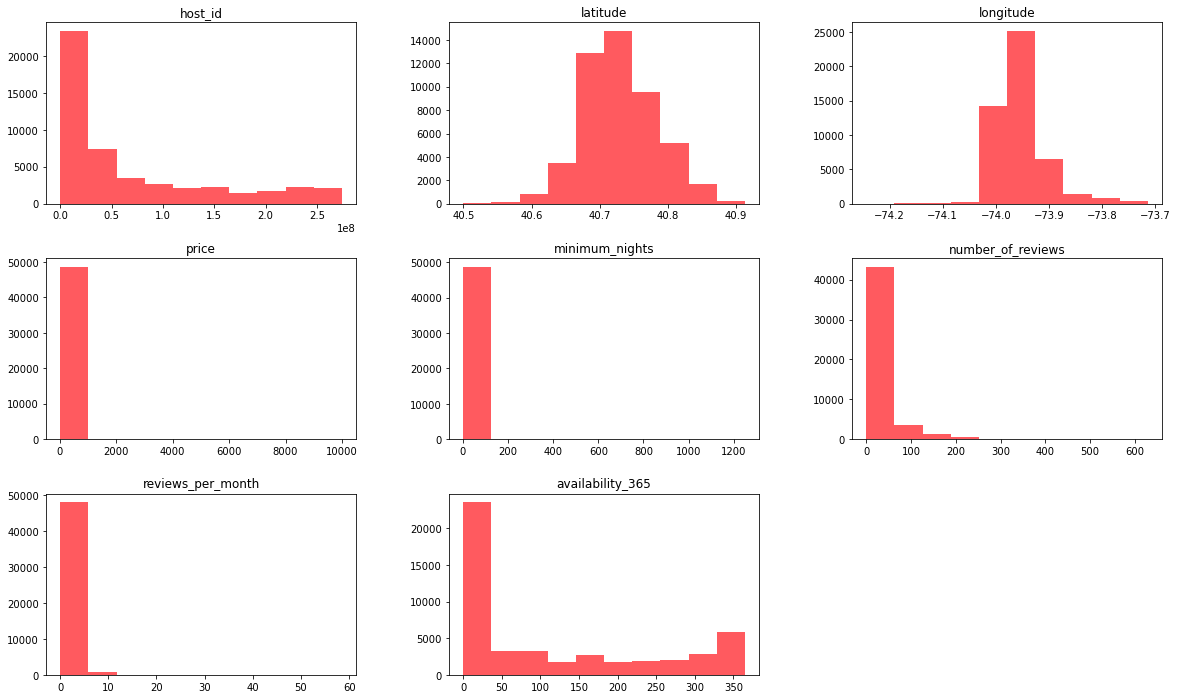

In [22]:
data.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

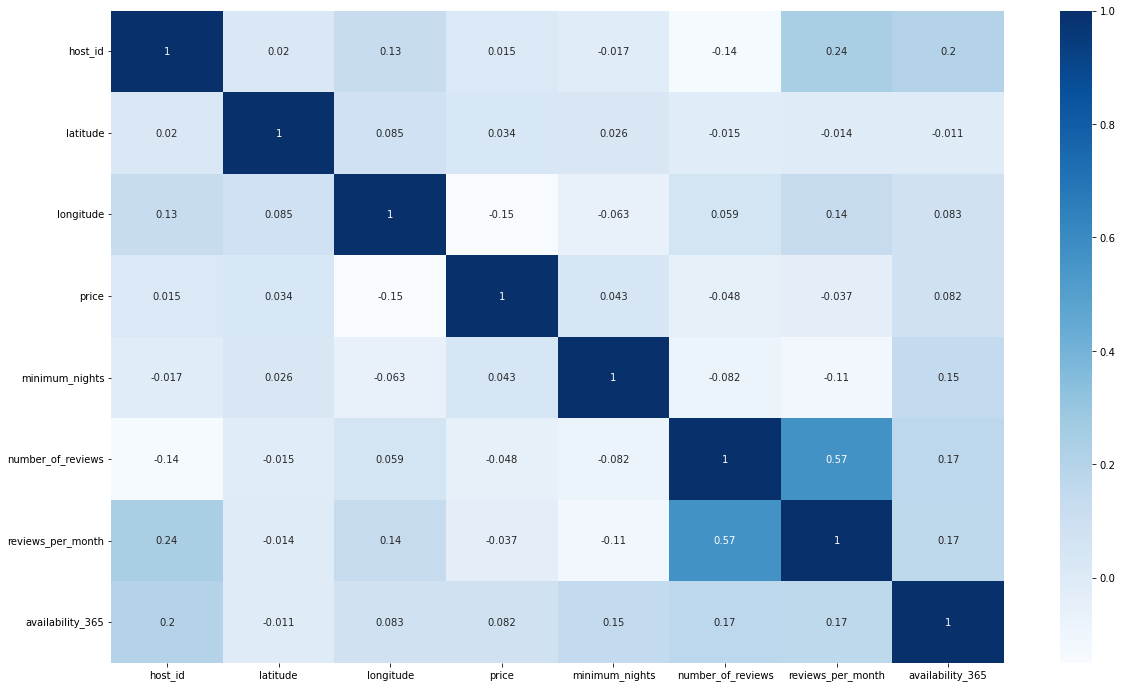

In [23]:
correlation = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation ,cbar = True, annot = True, cmap = "Blues")
plt.show()

#### Univariate Analysis

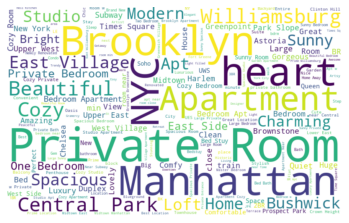

There are 1852579 words in the listing description.


In [24]:
text = ' '.join([text for text in data['name']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

print('There are {} words in the listing description.'.format(len(text)))

#### Bivariate Analysis: Cross Tabulation 

In [25]:
median_listing_price = data.groupby('n_group')['price'].agg('median').sort_values(ascending = False)
np.round(median_listing_price, 2)

n_group
Manhattan        150.0
Brooklyn          90.0
Queens            75.0
Staten Island     75.0
Bronx             65.0
Name: price, dtype: float64

Text(0, 0.5, 'Lisitng Price (USD)')

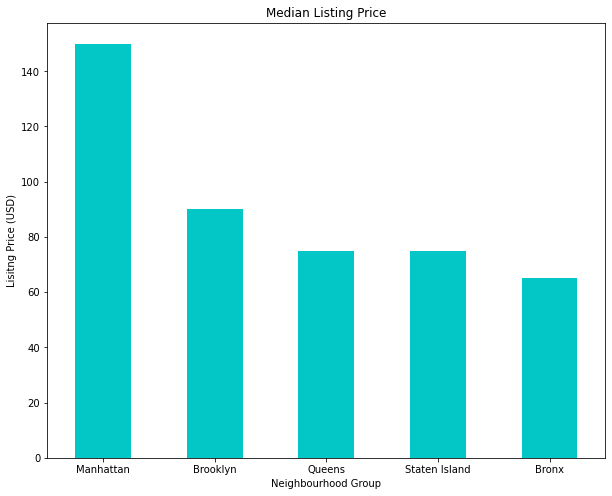

In [26]:
median_listing_price.plot(kind='bar', title = "Median Listing Price", figsize=(10,8), color = '#03C6C7')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation = 0)
plt.ylabel('Lisitng Price (USD)')

In [27]:
listings_n_group = data.groupby('n_group')['name'].count().sort_values(ascending = False)
listings_n_group

n_group
Manhattan        21651
Brooklyn         20089
Queens            5666
Bronx             1089
Staten Island      373
Name: name, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Manhattan'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Queens'),
  Text(3, 0, 'Bronx'),
  Text(4, 0, 'Staten Island')])

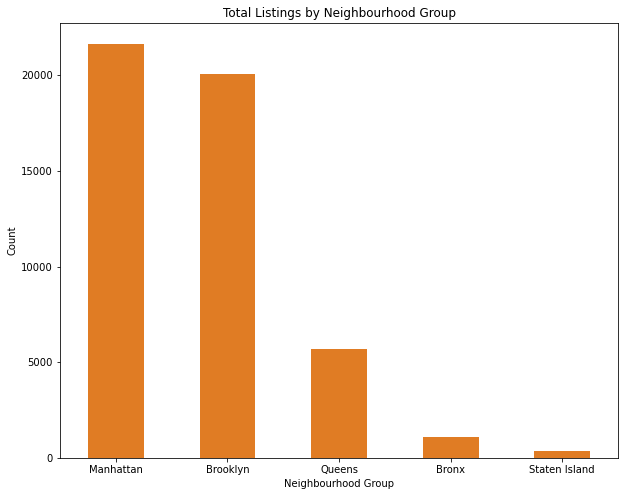

In [28]:
listings_n_group.plot(kind = 'bar', title = 'Total Listings by Neighbourhood Group',  figsize=(10,8), color = '#E07C24')
plt.ylabel('Count')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation = 0)

In [29]:
median_price_room_type = data.groupby('room_type')['price'].agg('median').sort_values(ascending = False)
np.round(median_price_room_type,2)

room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64

Text(0, 0.5, 'Listing Price (USD)')

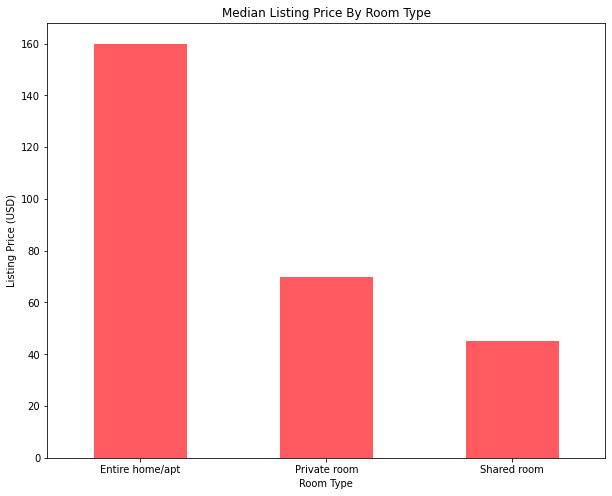

In [30]:
median_price_room_type.plot(kind = 'bar', title = 'Median Listing Price By Room Type', figsize=(10,8), color = '#FF5A5F')
plt.xlabel('Room Type')
plt.xticks(rotation = 0)
plt.ylabel('Listing Price (USD)')

In [31]:
reviews_room_type = data.groupby('room_type')['number_of_reviews'].agg('count')
reviews_room_type

room_type
Entire home/apt    25400
Private room       22311
Shared room         1157
Name: number_of_reviews, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room')])

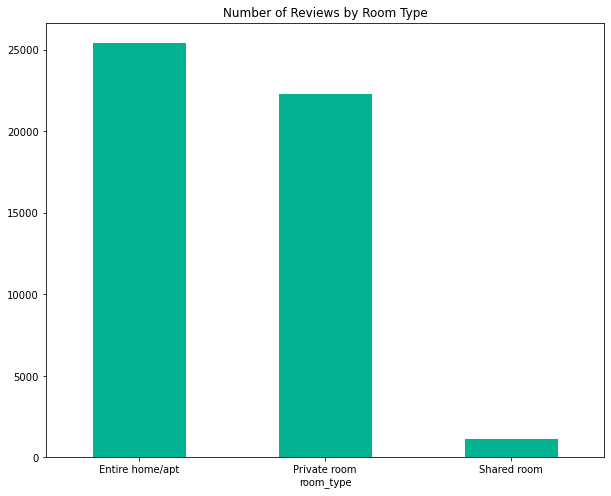

In [32]:
reviews_room_type .plot(kind = 'bar', title = 'Number of Reviews by Room Type',figsize=(10,8), color = '#02B290')
plt.xticks(rotation = 0)

In [33]:
top_ten_neighborhoods = data.groupby('neighborhood')['price'].agg('median').nlargest(n=10).sort_values(ascending = True)
top_ten_neighborhoods

neighborhood
Financial District    200.0
West Village          200.0
Midtown               210.0
Flatiron District     225.0
Willowbrook           249.0
NoHo                  250.0
Neponsit              274.0
Tribeca               295.0
Woodrow               700.0
Fort Wadsworth        800.0
Name: price, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Financial District'),
  Text(1, 0, 'West Village'),
  Text(2, 0, 'Midtown'),
  Text(3, 0, 'Flatiron District'),
  Text(4, 0, 'Willowbrook'),
  Text(5, 0, 'NoHo'),
  Text(6, 0, 'Neponsit'),
  Text(7, 0, 'Tribeca'),
  Text(8, 0, 'Woodrow'),
  Text(9, 0, 'Fort Wadsworth')])

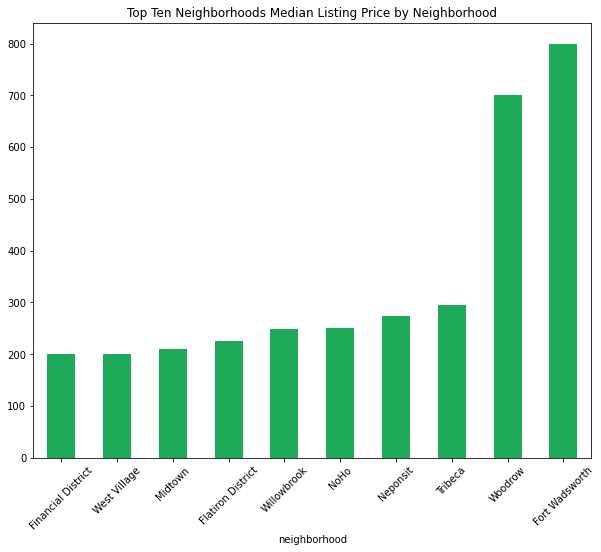

In [34]:
top_ten_neighborhoods.plot(kind = 'bar', title = 'Top Ten Neighborhoods Median Listing Price by Neighborhood', figsize=(10,8), color = '#1FAA59')
plt.xticks(rotation = 45)


In [35]:
bottom_ten_neighborhoods = df.groupby('neighborhood')['price'].agg('median').nsmallest(n=10).sort_values(ascending = True)
bottom_ten_neighborhoods

neighborhood
Concord           34.5
Castle Hill       39.0
Corona            40.0
Hunts Point       40.0
New Dorp Beach    40.0
Tremont           41.0
Bull's Head       45.0
Mount Eden        45.5
Soundview         49.0
Whitestone        49.0
Name: price, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Concord'),
  Text(1, 0, 'Castle Hill'),
  Text(2, 0, 'Corona'),
  Text(3, 0, 'Hunts Point'),
  Text(4, 0, 'New Dorp Beach'),
  Text(5, 0, 'Tremont'),
  Text(6, 0, "Bull's Head"),
  Text(7, 0, 'Mount Eden'),
  Text(8, 0, 'Soundview'),
  Text(9, 0, 'Whitestone')])

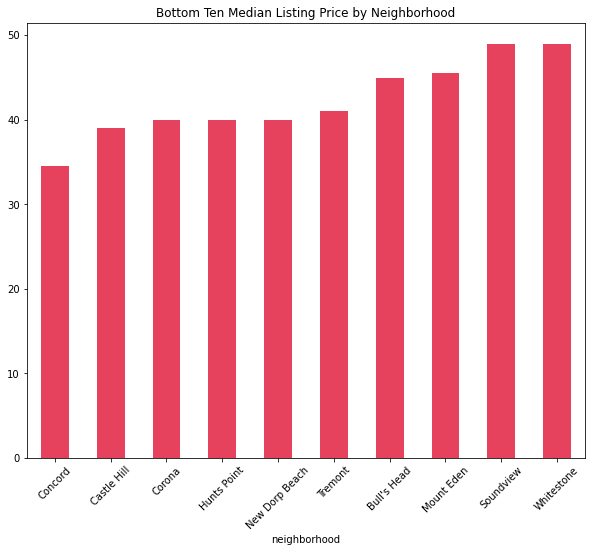

In [36]:
bottom_ten_neighborhoods.plot(kind = 'bar', title = 'Bottom Ten Median Listing Price by Neighborhood', figsize=(10,8), color = '#E6425E')
plt.xticks(rotation = 45)

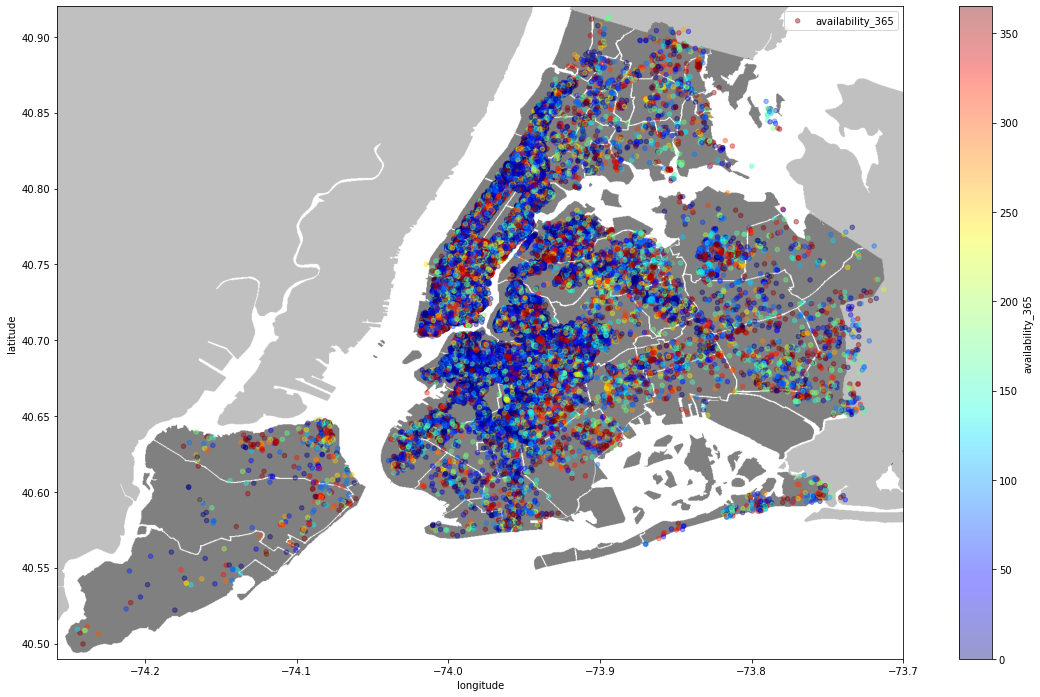

In [37]:
plt.rcParams["figure.figsize"] = (20,12)

image = iio.imread("C:/Users/ASUS/Desktop/Neighbourhoods_New_York_City_Map.png")
plt.imshow(image, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

data.plot(kind = 'scatter', x="longitude", y="latitude", label='availability_365', c = 'availability_365', ax = ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,12), grid = False)


plt.legend()
plt.show()

# Conclusions:


* There were several outliers; Because the listing price is arbitrary I kept the outliers since, the price is not due to error but the host's decision.

* Some of the numerical values were positively skewed. Therefore, I chose to focus on the median values, because it is less susceptible to skewed data.

* Entire apartments costs more and had more reviews compared to other room types. Manhattan and Brooklyn significantly had more listings than the other neighbourhood groups.

* Lastly, there were several listings in the Bronx that appeared in the bottom ten neighborhoods.there can be several factors that may contribute such as travelling, crime rate,etc.